## Self Attention


Using this famous paper: https://arxiv.org/pdf/1706.03762.pdf

In [14]:
import torch
from torch import nn
from torch.nn import functional as F

torch.manual_seed(3791)
B, T, C = 4, 8, 6 # Batch, Time, Channel
x = torch.randn(B, T, C)
x

tensor([[[-0.1155,  1.4004, -0.2636,  1.1846,  1.2524, -1.4922],
         [-0.8670,  0.4435, -0.1523,  1.5791,  0.4891, -0.6652],
         [ 0.4425,  1.0421,  2.1270,  0.2821,  1.6772,  0.9382],
         [ 2.4316, -2.7186,  0.4827, -0.3789, -1.6457,  1.4676],
         [-0.2117,  0.1744, -1.4542,  0.3945, -0.0648,  1.2230],
         [-0.4369, -0.9095, -0.3158, -0.0077, -0.3685, -0.4621],
         [-0.0730, -0.1383,  0.0828, -0.8913, -0.1860,  1.4274],
         [ 0.0764, -1.2949,  1.2127, -0.9746,  0.3595, -0.8611]],

        [[-1.0264, -0.1822, -2.1604,  1.1079, -0.2544,  2.3360],
         [-0.4107,  2.4999,  0.4165, -0.5933,  0.4560, -0.1843],
         [-1.1413,  0.6564,  0.5931,  0.2935,  0.4171, -0.4676],
         [ 1.3102,  1.8109, -0.8727,  0.5862, -1.2576, -0.5111],
         [-0.2096,  0.6701, -0.8327, -0.1827,  0.1226,  0.1414],
         [ 0.0103,  0.4948,  0.3764, -0.9829, -1.1029, -0.2477],
         [ 0.8806, -0.0726, -0.4488, -0.0483,  0.3869,  0.9365],
         [ 0.4525, -1.5

In [15]:
tril = torch.tril(torch.ones(T, T))
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [16]:
wei = torch.zeros(T, T)
wei

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
wei_1 = F.softmax(wei, dim=1)
wei_1

tensor([[0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [18]:
wei = wei.masked_fill(tril == 0 , float('-inf'))
wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
out = wei_1 @ x

print(x[0])
print()
print("-"*80)
print()
print(out[0])

tensor([[-0.1155,  1.4004, -0.2636,  1.1846,  1.2524, -1.4922],
        [-0.8670,  0.4435, -0.1523,  1.5791,  0.4891, -0.6652],
        [ 0.4425,  1.0421,  2.1270,  0.2821,  1.6772,  0.9382],
        [ 2.4316, -2.7186,  0.4827, -0.3789, -1.6457,  1.4676],
        [-0.2117,  0.1744, -1.4542,  0.3945, -0.0648,  1.2230],
        [-0.4369, -0.9095, -0.3158, -0.0077, -0.3685, -0.4621],
        [-0.0730, -0.1383,  0.0828, -0.8913, -0.1860,  1.4274],
        [ 0.0764, -1.2949,  1.2127, -0.9746,  0.3595, -0.8611]])

--------------------------------------------------------------------------------

tensor([[ 0.1558, -0.2501,  0.2149,  0.1485,  0.1892,  0.1970],
        [ 0.1558, -0.2501,  0.2149,  0.1485,  0.1892,  0.1970],
        [ 0.1558, -0.2501,  0.2149,  0.1485,  0.1892,  0.1970],
        [ 0.1558, -0.2501,  0.2149,  0.1485,  0.1892,  0.1970],
        [ 0.1558, -0.2501,  0.2149,  0.1485,  0.1892,  0.1970],
        [ 0.1558, -0.2501,  0.2149,  0.1485,  0.1892,  0.1970],
        [ 0.1558, -0

In [20]:
v_1 = torch.tensor([0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

v_1 @ x[0]

tensor([-0.4912,  0.9219, -0.2080,  1.3818,  0.8707, -1.0787])

In [21]:
-0.1155*0.5 + -0.8670*0.5

-0.49125

Every token will emitt a vector with a query and a key.

The query dot products with the keys of all tokens 

<br>

### Single Head of Self-attention

In [22]:
B, T, C = 2, 3, 4
x = torch.randn(B, T, C)
x

tensor([[[ 1.4935, -1.6276,  0.0872, -1.3071],
         [ 0.6953,  0.0186,  0.2562, -1.5210],
         [-1.2459,  0.0640, -0.9278, -0.9948]],

        [[ 1.1397,  0.2125, -1.1663,  0.1579],
         [ 0.2349, -0.1376,  0.5638, -1.3693],
         [-1.0884, -0.3520,  0.4274,  0.7945]]])

In [23]:
head_size = 2
key = nn.Linear(C, head_size, bias=False)
key(x)

tensor([[[ 1.1424, -0.9539],
         [ 0.2758, -0.5659],
         [-0.1669,  0.0464]],

        [[ 0.2494, -0.4233],
         [ 0.1964, -0.3667],
         [-0.2130,  0.5483]]], grad_fn=<UnsafeViewBackward0>)

The important thing here is that pytorch as initialised some random weights for us. Therefore by default the self attention head starts out with random weights that we will adjust through back-prop.

In [24]:
torch.manual_seed(3791)
B, T, C = 4, 8, 6
x = torch.randn(B, T, C)

head_size = 16

key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

k = key(x) # B x T x head_size
q = query(x)
v = value(x)

wei = q @ k.transpose(-2, -1) # B x T x 16 @ B x 16 x T -----> (B, T, T) matrix

tril = torch.tril(torch.ones(T, T))
wei = wei.masked_fill(tril == 0 , float('-inf'))
wei = F.softmax(wei, dim=1)

out = wei @ v
out.shape

torch.Size([4, 8, 16])

This is now data dependent due to the key and the query being used to generate the wei

In [25]:
wei.shape

torch.Size([4, 8, 8])

High affinity means that some tokens are used more to predict than others and we store and updated the weights for each batch.

<br>

### Self-attention Module Plugged into Bigram


In [26]:
with open('the_lord_of_the_rings.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [27]:
import torch.nn as nn
from torch.nn import functional as F

class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size) -> None:
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, idx, targets=None):
        # Batch x Time x Channel, tensor prediction of what is next
        logits = self.token_embedding_table(idx) 

        if targets is None:
            loss = None
        else:
            # Based on the PyTorch docs we need a B*C x T tensor to calcualate loss
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits , loss 
    
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context.
        for _ in range(max_new_tokens):
            logits, loss = self(idx)
            logits = logits[:, -1, :] 
            probs = F.softmax(logits, dim=-1) 
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

In [28]:
torch.manual_seed(3791) # Set manual seed for repeatability. There Rings for the Elven-kings... and so on.

batch_size = 4 # Number independant sequences of tokens we will process in parrallel
block_size = 8 # Maximum context length for predictions

def get_batch(data):
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y, 

xb, yb = get_batch(train_data)

m = BigramLanguageModel(len(chars)) 
m.generate(xb, 2)

tensor([[ 1, 68, 70, 67, 55, 57, 57, 56, 41,  4],
        [66, 56,  1, 72, 60, 61, 66, 63,  9,  9],
        [72, 60, 53, 72,  1, 60, 53, 56,  1, 54],
        [ 1, 72, 60, 57, 65,  1, 75, 60, 14, 86]])

In [32]:
idx_init = torch.zeros((1, 1), dtype=torch.long)
decode(m.generate(idx_init, max_new_tokens=100)[0].tolist())

'\nJw/cb, ?xb4`_D5Ht;Ó-4VKNóÓâft )jug:Eéúû5LZ\nSeT\nWëäó(!ái Uíps nmrH?;rTA\n;,1C5TxhUoRs!mLp_rÓë)ioéHDzCp'

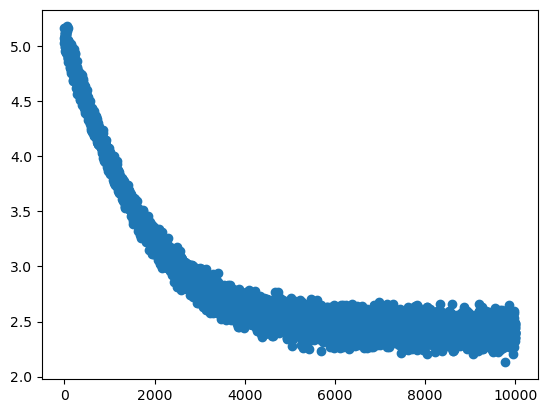

In [33]:
batch_size = 32
number_of_steps = 10000
losses = []
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

for steps in range(number_of_steps):
    xb, yb = get_batch(train_data)

    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

from matplotlib import pyplot as plt

plt.scatter(range(0, 10000), losses)

In [34]:
def generate_text(model, text_length):
    idx_init = torch.zeros((1, 1), dtype=torch.long)
    return decode(model.generate(idx_init, max_new_tokens=text_length)[0].tolist())

print(generate_text(m, 1000))


 eng w se sthet by Fome  wimood rlelbs ay,  s fe.ät iOf aret!ldis Thandsere Fou!ë' é'I anghe s wastunth RFOritheeresepremy: pe hinuent heme hop Th awea`Ridobowhiroot Brs t wngashayoumanut-m FYy wouPif wid frmin heigrd p  ArerKGaroondorCo fi03G; foroto spearen t owitce h ved an Oful Hing if pt oryoof rme wawinean le arlat. theng theark   ind  t. t mm.  n  isaine ?'
 uchut t  Galilin kEntoan a t  irideausited ptrotherd agstheeshere  issat t t  e  ngaá/Ourowe ho t xtit sarouthad?', toond, vee I is; blden'ok wagrd leevemit skeer ors ckery;_, rsabos doutherad wind len, to s oul sande, akiellyshedope se hesude imof f tr wed d whad anthp co ws, m,' akelifoprso jQDebu Br a  eetordofe  ade!
 nd de r hacl ocou yondlle  ss d  _Thatocror  wr t BOver tllvem.'s Ljalf oued. meileyouadans athenghef Fre ashig, t wenass ay iere t. n, wang, f ts me of obad t hedon hin _l ala2Ainod ow ooropee wit Then I touthand s. thas co lld tsh ly ous bEEppofes, tad I R. ty  Cong witur  Ocleche, t s; It Elfu ghe t Tho